In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import winsound
import random

In [2]:
df= pd.read_csv("../../data/processed/oline_merge.csv")

In [3]:
df = df[df.year >= df.draft_yr+4]
df =df[df.year != 2020]
len(df)

201

In [4]:
df = df.drop('year',axis=1)
df = df.drop('playername',axis=1)
df = df.drop('team',axis=1)
df = df.drop('basesalarycap (10^8)',axis=1)
df = df.drop('cashspent (M)',axis=1)
df = df.drop('caphit (M)',axis=1)
df = df.drop('Unnamed: 0',axis=1)
df = df.drop('Unnamed: 0.1',axis=1)
df = df.drop('catchpercent',axis=1)
df = df.drop('draft_yr',axis=1)

df = df.drop('yardspergame_run',axis=1)
df = df.drop('yardsperatt',axis=1)
df = df.drop('yardspertarget',axis=1)
df = df.drop('yardsperrec',axis=1)
df = df.drop('recpergame',axis=1)
df = df.drop('yardspergame_rec',axis=1)


In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [6]:
X = df.drop('Percenthit (%)',axis=1).values
y = df['Percenthit (%)'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [53]:
loaded_model = tf.keras.models.load_model('./savedmodels/norookiednn/')
predictions = loaded_model.predict(X_test)

print("MSE: ",mean_squared_error(y_test,predictions) )
print("RMSE: ",np.sqrt(mean_squared_error(y_test,predictions)) )
print("MAE: ",mean_absolute_error(y_test,predictions) )
print("ESV: ", explained_variance_score(y_test, predictions))

MSE:  2.735906130222005
RMSE:  1.6540574748847168
MAE:  1.249584093130343
ESV:  0.518537618315993


In [72]:
X_scl = scaler.fit_transform(X)
predictions = loaded_model.predict(X_scl)

In [73]:
type(y)

numpy.ndarray

In [74]:
type(predictions)

numpy.ndarray

In [124]:
set_aspect('equal')
plt.scatter(predictions,y)

plt.ylabel("Actual Values (%)")
plt.xlabel("Predicted Values (%)")
plt.title('Sequential DNN: Predicted vs Actual Cap %')

NameError: name 'set_aspect' is not defined

In [109]:
Aaron_Jones2020 = np.array([26,182,201,1104,9,77,14,14,63,47,355,2,15,30,2,5,3,1])

In [30]:
rbs =pd.read_csv("../../data/rbs_to_predict.csv")
names = rbs['playername'].values
real_y = rbs['2021capperc'].values
rbs = rbs.drop('tm',axis=1)
rbs = rbs.drop('playername',axis=1)
rbs= rbs.drop('2021capperc',axis=1)

In [31]:
rbs

,age,draft_pos,attempts,yards_run,tds_run,longgain_run,g,gs,tgt,rec,yards_rec,tds_rec,firstdowns,longgain_rec,fumbles,team_adjusted_line_yards,team_running_back_yards,team_stuffed_rate
0,27,182,201,1104,9,77,14,14,63,47,355,2,15,30,2,5,3,1
1,27,73,239,955,10,69,15,13,31,25,137,0,5,18,3,30,19,25
2,26,257,144,723,6,36,16,6,13,9,129,0,4,34,1,8,1,5
3,26,205,169,721,6,59,13,11,43,35,215,0,10,18,2,32,32,28
4,27,249,141,681,5,29,12,12,46,37,287,4,14,29,1,10,15,17
5,26,134,119,505,2,25,14,3,35,31,236,1,11,29,0,5,3,1
6,27,257,118,502,1,55,11,8,14,7,28,0,1,11,0,28,12,32


In [32]:
names

array(['Aaron Jones', 'Kenyan Drake', 'Gus Edwards', 'James Conner',
       'Chris Carson', 'Jamaal Williams', 'Phillip Lindsay'], dtype=object)

In [33]:
real_y

array([2.369     , 1.592     , 1.796     , 0.9288    , 1.327     ,
       0.86252654, 1.63      ])

In [46]:
realpreds = []

for i in range(len(names)):
    print(names[i])
    print(rbs.iloc[i].to_numpy())
    predi = loaded_model.predict(scaler.transform(rbs.iloc[i].to_numpy().reshape(1, -1)))
    realpreds.append(predi[0][0])
    print(predi[0][0])
    print(real_y[i])

Aaron Jones
[  27  182  201 1104    9   77   14   14   63   47  355    2   15   30
    2    5    3    1]
1.845775
2.369
Kenyan Drake
[ 27  73 239 955  10  69  15  13  31  25 137   0   5  18   3  30  19  25]
4.848217
1.5919999999999999
Gus Edwards
[ 26 257 144 723   6  36  16   6  13   9 129   0   4  34   1   8   1   5]
1.1705719
1.796
James Conner
[ 26 205 169 721   6  59  13  11  43  35 215   0  10  18   2  32  32  28]
3.0994954
0.9288
Chris Carson
[ 27 249 141 681   5  29  12  12  46  37 287   4  14  29   1  10  15  17]
1.5447459
1.327
Jamaal Williams
[ 26 134 119 505   2  25  14   3  35  31 236   1  11  29   0   5   3   1]
1.2456422
0.8625265390000001
Phillip Lindsay
[ 27 257 118 502   1  55  11   8  14   7  28   0   1  11   0  28  12  32]
1.0253081
1.63


In [39]:
realpreds

[1.845775, 4.848217, 1.1705719, 3.0994954, 1.5447459, 1.2456422, 1.0253081]

In [40]:
real_y

array([2.369     , 1.592     , 1.796     , 0.9288    , 1.327     ,
       0.86252654, 1.63      ])

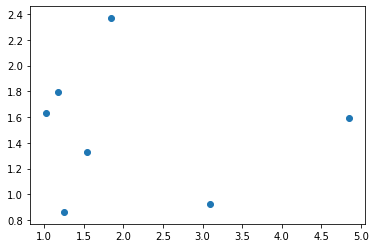

MAE: 1.3456728363735153
MSE: 3.149127825844518
RMSE: 1.7745782106868433
ESV:  0.4712326416436068


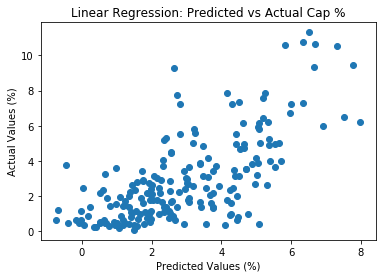

In [77]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
X_scl = scaler.fit_transform(X)
predictions = lm.predict(X_scl)
plt.scatter(predictions,y)
plt.ylabel("Actual Values (%)")
plt.xlabel("Predicted Values (%)")
plt.title("Linear Regression: Predicted vs Actual Cap %")
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))
print("ESV: ", explained_variance_score(y, predictions))

In [49]:
loaded_model = tf.keras.models.load_model('./savedmodels/norookiednn/')
loaded_model.summary()

Model: "sequential_417"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2025 (Dense)           (None, 18)                342       
_________________________________________________________________
dense_2026 (Dense)           (None, 40)                760       
_________________________________________________________________
dense_2027 (Dense)           (None, 40)                1640      
_________________________________________________________________
dense_2028 (Dense)           (None, 40)                1640      
_________________________________________________________________
dense_2029 (Dense)           (None, 1)                 41        
Total params: 4,423
Trainable params: 4,423
Non-trainable params: 0
_________________________________________________________________


In [51]:
loaded_model.layers

In [118]:
rbs =pd.read_csv("../../data/rbs_to_predict.csv")
names = rbs['playername'].values
real_y = rbs['2021capperc'].values
rbs = rbs.drop('tm',axis=1)
rbs = rbs.drop('playername',axis=1)
rbs= rbs.drop('2021capperc',axis=1)

real_compare= pd.DataFrame([],columns=['name', 'predicted','real'])
realpreds = []

for i in range(len(names)):
    print(names[i])
    print(rbs.iloc[i].to_numpy())
    predi = loaded_model.predict(scaler.transform(rbs.iloc[i].to_numpy().reshape(1, -1)))
    realpreds.append(predi[0][0])
    print(predi[0][0])
    print(real_y[i])
    listi = [['',0,0]]
    listi[0][0] = names[i]
    listi[0][1] = predi[0][0]
    listi[0][2] = real_y[i].round(decimals=3)
    listi = np.array(listi)
    print(listi)
    dfi = pd.DataFrame(listi,columns=['name', 'predicted','real'])
    real_compare = real_compare.append(dfi)
    
    print()

real_compare

Aaron Jones
[  27  182  201 1104    9   77   14   14   63   47  355    2   15   30
    2    5    3    1]
1.845775
2.369
[['Aaron Jones' '1.845775' '2.369']]

Kenyan Drake
[ 27  73 239 955  10  69  15  13  31  25 137   0   5  18   3  30  19  25]
4.848217
1.5919999999999999
[['Kenyan Drake' '4.848217' '1.592']]

Gus Edwards
[ 26 257 144 723   6  36  16   6  13   9 129   0   4  34   1   8   1   5]
1.1705719
1.796
[['Gus Edwards' '1.1705719' '1.796']]

James Conner
[ 26 205 169 721   6  59  13  11  43  35 215   0  10  18   2  32  32  28]
3.0994954
0.9288
[['James Conner' '3.0994954' '0.929']]

Chris Carson
[ 27 249 141 681   5  29  12  12  46  37 287   4  14  29   1  10  15  17]
1.5447459
1.327
[['Chris Carson' '1.5447459' '1.327']]

Jamaal Williams
[ 26 134 119 505   2  25  14   3  35  31 236   1  11  29   0   5   3   1]
1.2456422
0.8625265390000001
[['Jamaal Williams' '1.2456422' '0.863']]

Phillip Lindsay
[ 27 257 118 502   1  55  11   8  14   7  28   0   1  11   0  28  12  32]
1.025308

,name,predicted,real
0,Aaron Jones,1.845775,2.369
0,Kenyan Drake,4.848217,1.592
0,Gus Edwards,1.1705719,1.796
0,James Conner,3.0994954,0.929
0,Chris Carson,1.5447459,1.327
0,Jamaal Williams,1.2456422,0.863
0,Phillip Lindsay,1.0253081,1.63
